# <font color='#11ab11'>  Weather in Szeged 2006-2016

<hr>
    
Regression on Weather in Szeged 2006-2016 dataset. 

    
The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:

- time
    
    
- summary
    
    
- precipType
    
    
- temperature
    
    
- apparentTemperature
    
    
- humidity
    
    
- windSpeed
    
    
- windBearing
    
    
- visibility
    
    
- loudCover
    
    
- pressure
    
**Goal :**
    
Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?
    
<hr> 
    
Everything required for this exercise is available at : 
   
 
    
   
***GitHub***  : <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU.git" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU/tree/main/Questions/Q-Series3" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "https://drive.google.com/drive/folders/1l3P_yFAoYrip1KmuajKSa5a_eymcd-tJ?usp=sharing" > Q-ML-series3 google drive </a>
    
    

# <font color='#11ab11'>  Import libraries
    
<hr>
    
Just as the title says. Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrix
from xgboost import XGBRegressor

# <font color='#11ab11'>  Import data
<hr>
    

Using pandas to read the data. Data is availabe from the sourse website (Kaggle). You can download the data from this link :
<a href = "https://www.kaggle.com/datasets/budincsevity/szeged-weather">Weather in Szeged 2006-2016</a>
    


In [2]:
path = "../Data/"
dataset = pd.read_csv(path + "weatherHistory.csv")

## <font color='#11ab11'>   data information
    
Information about column data types and the shape of the dataset.
    
There are 96453 samples with 12 columns of dependant and independent variables.
    
You can check top 5 samples of the dataset

In [3]:
print(dataset.dtypes)
print("shape of the dataset is : ",dataset.shape)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object
shape of the dataset is :  (96453, 12)


In [4]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## <font color='#11ab11'>   Many useless columns and new dataframes
    
There are many useless columns. These information are redundant therefore it is more efficient to drop them from our dataframe
    
- Formatted Date
    
- Precip Type
    
- Summary
    
- Daily Summary
    
- Loud Cover
    
We are going to remove these columns because other columns can describe them. For example humidity can define whether it has rained or not or Wind speed can be effective to the clouds.
    
    
Based on our objective we want to define the relationship between Temperature, Apparent Temperature and Humidity. To do this 
We create 5 dataframes each correspond to a different task
    
- Task 1 :
    
    regression between X (Humidity) and Y (Temperature) ---> df_task1
    
    
- Task 2 :
    
    regression between X (Humidity) and Y (Apparant Temperature) ---> df_task2
    
    
<del>- Task 3 : 
    
<del>     regression between X (Humidity , Wind Speed , ...) and  (Temperature ) ---> df_task3
    
    
<del>- Task 4 :
    
<del>     regression between X (Humidity , Wind Speed , ...) and  (Apparant Temperature ) ---> df_task4
    
    
Edit :  Since there are many other datasets and the shortage of time, we are just going to perform linear regression on both task 1 and task 2

In [5]:
dataset_df = dataset.drop(columns=['Formatted Date', 'Precip Type', 'Summary', 'Daily Summary', 'Loud Cover'])

dataset_df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [6]:
df_task1 = dataset_df[['Temperature (C)','Humidity']].sort_values(by = 'Humidity')
df_task2 = dataset_df[['Apparent Temperature (C)','Humidity']].sort_values(by = 'Humidity')
#df_task3 = dataset_df
#df_task4 = dataset_df

In [7]:
df_task1.describe()

,Temperature (C),Humidity
count,96453.000000,96453.000000
mean,11.932678,0.734899
std,9.551546,0.195473
min,-21.822222,0.000000
25%,4.688889,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.905556,1.000000


In [8]:
df_task2.describe()

,Apparent Temperature (C),Humidity
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


## <font color='#11ab11'>   train and test split
    
Split a portion of data so that it can be used as test to evaluate our model. 

In [9]:
task1_x = df_task1['Humidity']
task1_y = df_task1['Temperature (C)']
task1_x_train, task1_x_test, task1_y_train, task1_y_test = train_test_split(task1_x, task1_y, test_size= 0.25)



task2_x = df_task2['Humidity']
task2_y = df_task2['Apparent Temperature (C)']
task2_x_train, task2_x_test, task2_y_train, task2_y_test = train_test_split(task2_x, task2_y, test_size= 0.25)



# dmatrix transformation for cubic splines

task1_transformed_x_train = dmatrix(
            "bs(train, knots=(0.05,0.1,0.15,0.20,0.6), degree=10, include_intercept=False)", 
                {"train": task1_x_train},return_type='dataframe')

task1_transformed_x_test = dmatrix(
            "bs(train, knots=(0.05,0.1,0.15,0.20,0.6), degree=10, include_intercept=False)", 
                {"train": task1_x_test},return_type='dataframe')
    
task2_transformed_x_train = dmatrix(
            "bs(train, knots=(0.05,0.1,0.15,0.20,0.6), degree=10, include_intercept=False)", 
                {"train": task2_x_train},return_type='dataframe')

task2_transformed_x_test = dmatrix(
            "bs(train, knots=(0.05,0.1,0.15,0.20,0.6), degree=10, include_intercept=False)", 
                {"train": task2_x_test},return_type='dataframe')


# <font color='#11ab11'>   Visualization
    
<hr>
    
Visualizing task 1 and task 2  XY-plot.
    
As you can see both task 1 and task 2 have almost the same visual.

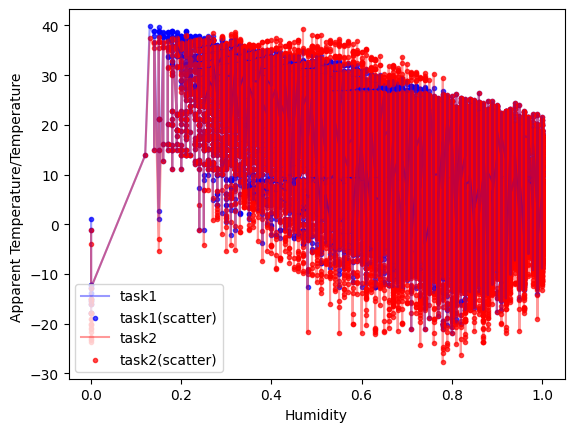

In [10]:
plt.plot(df_task1['Humidity'],df_task1['Temperature (C)'],color = "blue",label = 'task1', alpha = 0.4)
plt.scatter(df_task1['Humidity'],df_task1['Temperature (C)'],color = "blue",label = 'task1(scatter)',marker='.', alpha = 0.7)
plt.plot(df_task2['Humidity'],df_task2['Apparent Temperature (C)'],color='red',label = 'task2', alpha = 0.4)
plt.scatter(df_task2['Humidity'],df_task2['Apparent Temperature (C)'],color='red',label = 'task2(scatter)',marker= '.', alpha = 0.7)
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature/Temperature ')
plt.legend(loc = 'best')
plt.show()

# <font color='#11ab11'>   Model
 
<hr>
    
    
Data is ready to be used by our model, so before that we need to create multiple models so that each model will train on the training data and evaluated on the test data.
    
    
We choose a linear regression and polynomial regression for test tasks. degree of polynomial regressions are 1, 10, 30, 55, 100. Overall 5 linear regression models per task.
    
Based on the above visualization, we can guess that spline regression might also give us good results, therefore we include one more models for each task . 
    
$\bullet$ Cubic Spline
    
    
We are also going to use XGBoost to create a model on our tasks. 
    
$\bullet$ XGBoost
    
    
**Note :  Splines didn't work as expected, XGBoost is taking some time to run, please be patient ...**

In [11]:
task1_models = {}
task2_models = {}

M = [1, 10, 30, 55, 100]
polynomials = {}
for _degree in M:
    polynomials[_degree] = PolynomialFeatures(degree = _degree, include_bias = True)

    
# Linear Regression models 

for _degree in M:
        model1 = LinearRegression()
        model2 = LinearRegression()
        
        x_train_1 = task1_x_train.values.reshape(-1,1)
        x_train_1 = polynomials[_degree].fit_transform(x_train_1)
        y_train_1 = task1_y_train.values
        
        x_train_2 = task2_x_train.values.reshape(-1,1)
        x_train_2 = polynomials[_degree].fit_transform(x_train_2)
        y_train_2 = task2_y_train.values
        
        model1.fit(x_train_1,y_train_1)
        model2.fit(x_train_2,y_train_2)
        
        
        task1_models[_degree] = model1
        task2_models[_degree] = model2
        
#  Cubic Splines
    
task1_models['Cubic Splines'] = sm.GLM(task1_y_train, task1_transformed_x_train).fit()
task2_models['Cubic Splines'] = sm.GLM(task2_y_train, task2_transformed_x_train).fit()


# XGBoost 

xgb1 = XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb2 = XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

task1_models['XGBoost'] = xgb1.fit(task1_x_train,task1_y_train)
task2_models['XGBoost'] = xgb2.fit(task2_x_train,task2_y_train)


## <font color='#11ab11'>   Predict
    
Our goal is to use these models to predict the Apparent Temperature or Temperature  using humidity.

In [12]:
task1_predicted = {}
task2_predicted = {}

# Linear / Polynomial Regression

for _degree in M:
    
    task1_predicted[_degree] = {
        'train' : task1_models[_degree].predict(polynomials[_degree].fit_transform(task1_x_train.values.reshape(-1,1))), 
        'test' : task1_models[_degree].predict(polynomials[_degree].fit_transform(task1_x_test.values.reshape(-1,1)))
        }
    
    task2_predicted[_degree] = {
        'train' : task2_models[_degree].predict(polynomials[_degree].fit_transform(task2_x_train.values.reshape(-1,1))), 
        'test' : task2_models[_degree].predict(polynomials[_degree].fit_transform(task2_x_test.values.reshape(-1,1)))
        } 


# Cubic Splines
task2_transformed_x = dmatrix(
            "bs(train, knots=(0.05,0.1,0.15,0.20,0.6), degree=10, include_intercept=True)", 
                {"train": task2_x_train},return_type='dataframe')    

task1_predicted['Cubic Splines'] = {
        'train' : task1_models['Cubic Splines'].predict(task1_transformed_x_train), 
        'test' : task1_models['Cubic Splines'].predict(task1_transformed_x_test)
        }

task2_predicted['Cubic Splines'] = {
        'train' : task2_models['Cubic Splines'].predict(task2_transformed_x_train), 
        'test' : task2_models['Cubic Splines'].predict(task2_transformed_x_test)
        }

# XGBoost

task1_predicted['XGBoost'] = {
        'train' : task1_models['XGBoost'].predict(task1_x_train),
        'test' : task1_models['XGBoost'].predict(task1_x_test)
}

task2_predicted['XGBoost'] = {
        'train' : task2_models['XGBoost'].predict(task2_x_train),
        'test' : task2_models['XGBoost'].predict(task2_x_test)
}



## <font color='#11ab11'>   RMSE
    
We are going to use RMSE to evaluate our models; Therefore we need to define it :

    

Edit :  It is also possible to use it from sklearn 
    
    
$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(\hat y_i - y_i)^2}{n}}$  

In [13]:
def RMSE(Y,Yhat):
    N = len(Y)
    rmse = np.sqrt(np.sum((Y -Yhat)**2) / N )
    return rmse

## <font color='#11ab11'> Evaluation
    
    
Evaluate our models using RMSE

In [14]:
task1_rmse = {}
task2_rmse = {}

# Linear / Polynomial Regression
for _degree in M: 
    task1_rmse[_degree]  = {
        'train' : RMSE(task1_y_train,task1_predicted[_degree]['train']),
        'test' : RMSE(task1_y_test,task1_predicted[_degree]['test'])
    }
    
    task2_rmse[_degree]  = {
        'train' : RMSE(task2_y_train,task2_predicted[_degree]['train']),
        'test' : RMSE(task2_y_test,task2_predicted[_degree]['test'])
    } 
 

# Cubic Splines
task1_rmse['Cubic Splines'] = {
        'train' : RMSE(task1_y_train,task1_predicted['Cubic Splines']['train']),
        'test' : RMSE(task1_y_test,task1_predicted['Cubic Splines']['test'])   
}

task2_rmse['Cubic Splines'] = {
        'train' : RMSE(task2_y_train,task2_predicted['Cubic Splines']['train']),
        'test' : RMSE(task2_y_test,task2_predicted['Cubic Splines']['test'])   
}


# XGBoost
task1_rmse['XGBoost'] = {
        'train' :RMSE(task1_y_train,task1_predicted['XGBoost']['train']), 
        'test' : RMSE(task1_y_test,task1_predicted['XGBoost']['test'])   
}

task2_rmse['XGBoost'] = {
        'train' :RMSE(task2_y_train,task2_predicted['XGBoost']['train']), 
        'test' : RMSE(task2_y_test,task2_predicted['XGBoost']['test'])   
}

# <font color='#11ab11'>   Result
    
 
<hr>
    
    
You can check the result for each model and choose the best model to predict the Apparent Temperature or Temperature using Humidity.


    
We will also Visualize our predicted vs actual data on both train and test for task 1 and 2.
 
    
**Edit  : There is a problem with spline regression , Just Ignore Spline regression for the time being.**

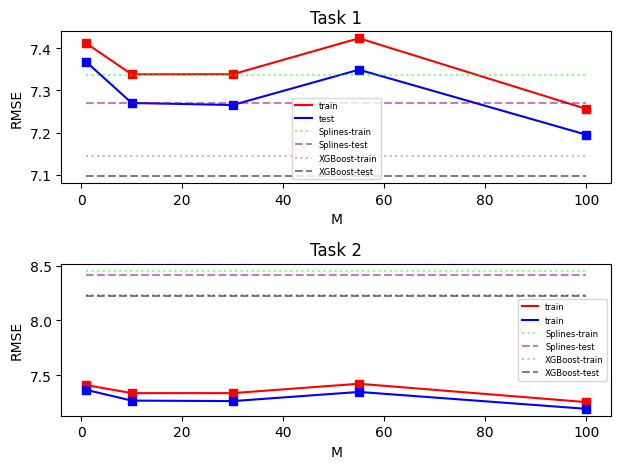

In [15]:
fig,ax = plt.subplots(2,1)

ax[0].plot(M, [task1_rmse[i]['train'] for i in M], color = 'red', label = 'train')
ax[0].scatter(M, [task1_rmse[i]['train'] for i in M], color = 'red', marker= 's')
ax[0].plot(M, [task1_rmse[i]['test'] for i in M], color = 'blue', label = 'test')
ax[0].scatter(M, [task1_rmse[i]['test'] for i in M], color = 'blue', marker= 's')
ax[0].plot(M, [task1_rmse['Cubic Splines']['train'] for i in M],color = 'lime' 
               , linestyle = 'dotted',label = 'Splines-train',alpha = 0.5)
ax[0].plot(M, [task1_rmse['Cubic Splines']['test'] for i in M],color = 'purple' 
               , linestyle = 'dashed',label = 'Splines-test',alpha = 0.5)
ax[0].plot(M, [task1_rmse['XGBoost']['train'] for i in M],color = 'gray' 
               , linestyle = 'dotted',label = 'XGBoost-train',alpha = 0.5)
ax[0].plot(M, [task1_rmse['XGBoost']['test'] for i in M],color = 'black' 
               , linestyle = 'dashed',label = 'XGBoost-test',alpha = 0.5)
ax[0].set_xlabel('M')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Task 1')
ax[0].legend(loc = 'best', prop = {'size' : 6})


ax[1].plot(M, [task1_rmse[i]['train'] for i in M], color = 'red', label = 'train')
ax[1].scatter(M, [task1_rmse[i]['train'] for i in M], color = 'red', marker= 's')
ax[1].plot(M, [task1_rmse[i]['test'] for i in M], color = 'blue', label = 'train')
ax[1].scatter(M, [task1_rmse[i]['test'] for i in M], color = 'blue', marker= 's')
ax[1].plot(M, [task2_rmse['Cubic Splines']['train'] for i in M],color = 'lime' 
           , linestyle = 'dotted',label = 'Splines-train',alpha = 0.5)
ax[1].plot(M, [task2_rmse['Cubic Splines']['test'] for i in M],color = 'purple' 
           , linestyle = 'dashed',label = 'Splines-test',alpha = 0.5)
ax[1].plot(M, [task2_rmse['XGBoost']['train'] for i in M],color = 'gray' 
           , linestyle = 'dotted',label = 'XGBoost-train',alpha = 0.5)
ax[1].plot(M, [task2_rmse['XGBoost']['test'] for i in M],color = 'black' 
           , linestyle = 'dashed',label = 'XGBoost-test',alpha = 0.5)
ax[1].set_xlabel('M')
ax[1].set_ylabel('RMSE')
ax[1].set_title('Task 2')
ax[1].legend(loc = 'best',prop = {'size' : 6})


fig.tight_layout()

## <font color='#11ab11'>   Linear/Polynomials Regression Models 
 
X and Yhat plot on linear and polynomial regression models.

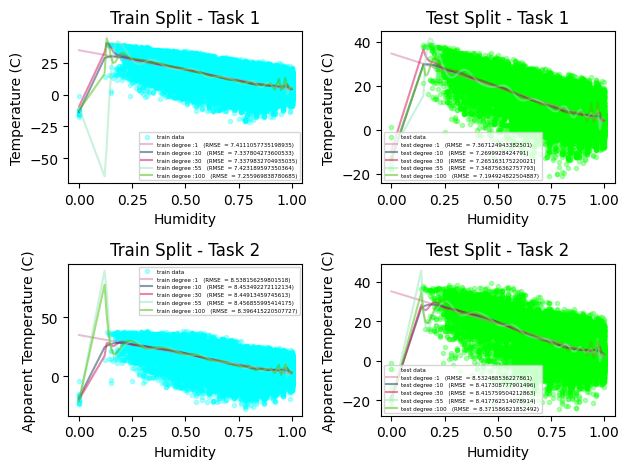

In [16]:
number_of_colors = 20
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


fig, ax = plt.subplots(2,2)

ax[0][0].scatter(task1_x_train,task1_y_train,color = 'aqua',marker = '.',label = 'train data',alpha = 0.3)

cindx=0
for _degree in M:
    temp_df = pd.DataFrame({'x' : task1_x_train, 't': task1_predicted[_degree]['train'] }).sort_values(by = 'x')
    ax[0][0].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'train degree :'+ str(_degree) + '   (RMSE  = ' + str(task1_rmse[_degree]['train']) + ')')
    cindx+=1



ax[0][0].set_xlabel('Humidity')
ax[0][0].set_ylabel('Temperature (C)')
ax[0][0].set_title('Train Split - Task 1')
ax[0][0].legend(loc = 'best', prop={'size': 4})


ax[0][1].scatter(task1_x_test,task1_y_test,color = 'lime',marker = '.',label = 'test data',alpha = 0.3)
cindx=0
for _degree in M:
    temp_df = pd.DataFrame({'x' : task1_x_test, 't': task1_predicted[_degree]['test'] }).sort_values(by = 'x')
    ax[0][1].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
            ,alpha = 0.5,label = 'test degree :'+ str(_degree) + '   (RMSE  = ' + str(task1_rmse[_degree]['test']) + ')')
    cindx+=1

ax[0][1].set_xlabel('Humidity')
ax[0][1].set_ylabel('Temperature (C)')
ax[0][1].set_title('Test Split - Task 1')
ax[0][1].legend(loc = 'best', prop={'size': 4})



ax[1][0].scatter(task2_x_train,task2_y_train,color = 'aqua',marker = '.',label = 'train data',alpha = 0.3)

cindx=0
for _degree in M:
    temp_df = pd.DataFrame({'x' : task2_x_train, 't': task2_predicted[_degree]['train'] }).sort_values(by = 'x')
    ax[1][0].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'train degree :'+ str(_degree) + '   (RMSE  = ' + str(task2_rmse[_degree]['train']) + ')')
    cindx+=1



ax[1][0].set_xlabel('Humidity')
ax[1][0].set_ylabel('Apparent Temperature (C)')
ax[1][0].set_title('Train Split - Task 2')
ax[1][0].legend(loc = 'best', prop={'size': 4})


ax[1][1].scatter(task2_x_test,task2_y_test,color = 'lime',marker = '.',label = 'test data',alpha = 0.3)
cindx=0
for _degree in M:
    temp_df = pd.DataFrame({'x' : task2_x_test, 't': task2_predicted[_degree]['test'] }).sort_values(by = 'x')
    ax[1][1].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
            ,alpha = 0.5,label = 'test degree :'+ str(_degree) + '   (RMSE  = ' + str(task2_rmse[_degree]['test']) + ')')
    cindx+=1

ax[1][1].set_xlabel('Humidity')
ax[1][1].set_ylabel('Apparent Temperature (C)')
ax[1][1].set_title('Test Split - Task 2')
ax[1][1].legend(loc = 'best', prop={'size': 4})


fig.tight_layout()
plt.show()

## <font color='#11ab11'>   Cubic Spline Regression Model 
 
X and Yhat plot on cubic spline regression model.

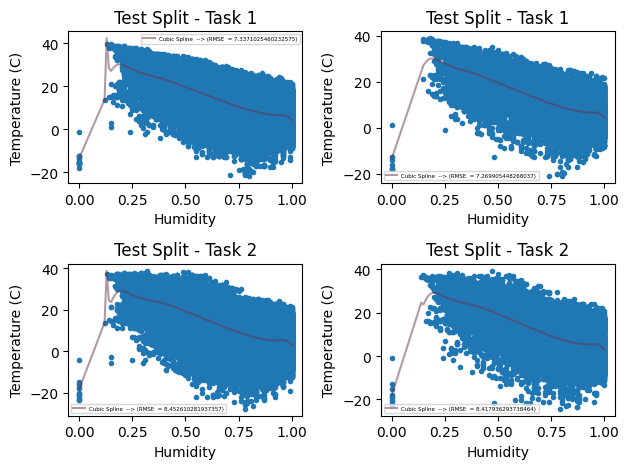

In [18]:
number_of_colors = 1
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cindx = 0

fig,ax = plt.subplots(2,2)

ax[0][0].scatter(task1_x_train,task1_y_train,marker = '.')
temp_df = pd.DataFrame({'x' : task1_x_train, 't': task1_predicted['Cubic Splines']['train']}).sort_values(by = 'x')
ax[0][0].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'Cubic Spline  --> (RMSE  = '  + str(task1_rmse['Cubic Splines']['train']) + ')')

ax[0][0].set_xlabel('Humidity')
ax[0][0].set_ylabel('Temperature (C)')
ax[0][0].set_title('Test Split - Task 1')
ax[0][0].legend(loc = 'best', prop={'size': 4})

ax[0][1].scatter(task1_x_test,task1_y_test,marker = '.')
temp_df = pd.DataFrame({'x' : task1_x_test, 't': task1_predicted['Cubic Splines']['test']}).sort_values(by = 'x')
ax[0][1].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'Cubic Spline  --> (RMSE  = '  + str(task1_rmse['Cubic Splines']['test']) + ')')

ax[0][1].set_xlabel('Humidity')
ax[0][1].set_ylabel('Temperature (C)')
ax[0][1].set_title('Test Split - Task 1')
ax[0][1].legend(loc = 'best', prop={'size': 4})


ax[1][0].scatter(task2_x_train,task2_y_train,marker = '.')
temp_df = pd.DataFrame({'x' : task2_x_train, 't': task2_predicted['Cubic Splines']['train']}).sort_values(by = 'x')
ax[1][0].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'Cubic Spline  --> (RMSE  = '  + str(task2_rmse['Cubic Splines']['train']) + ')')

ax[1][0].set_xlabel('Humidity')
ax[1][0].set_ylabel('Temperature (C)')
ax[1][0].set_title('Test Split - Task 2')
ax[1][0].legend(loc = 'best', prop={'size': 4})

ax[1][1].scatter(task2_x_test,task2_y_test,marker = '.')
temp_df = pd.DataFrame({'x' : task2_x_test, 't': task2_predicted['Cubic Splines']['test']}).sort_values(by = 'x')
ax[1][1].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'Cubic Spline  --> (RMSE  = '  + str(task2_rmse['Cubic Splines']['test']) + ')')

ax[1][1].set_xlabel('Humidity')
ax[1][1].set_ylabel('Temperature (C)')
ax[1][1].set_title('Test Split - Task 2')
ax[1][1].legend(loc = 'best', prop={'size': 4})

fig.tight_layout()
plt.show()

## <font color='#11ab11'>   XGBoost
 
X and Yhat plot on XGBoost model.

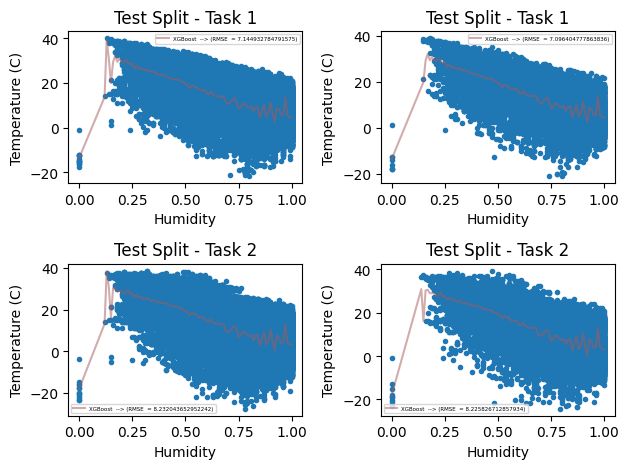

In [19]:
number_of_colors = 1
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cindx = 0

fig,ax = plt.subplots(2,2)

ax[0][0].scatter(task1_x_train,task1_y_train,marker = '.')
temp_df = pd.DataFrame({'x' : task1_x_train, 't': task1_predicted['XGBoost']['train']}).sort_values(by = 'x')
ax[0][0].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'XGBoost  --> (RMSE  = '  + str(task1_rmse['XGBoost']['train']) + ')')

ax[0][0].set_xlabel('Humidity')
ax[0][0].set_ylabel('Temperature (C)')
ax[0][0].set_title('Test Split - Task 1')
ax[0][0].legend(loc = 'best', prop={'size': 4})

ax[0][1].scatter(task1_x_test,task1_y_test,marker = '.')
temp_df = pd.DataFrame({'x' : task1_x_test, 't': task1_predicted['XGBoost']['test']}).sort_values(by = 'x')
ax[0][1].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'XGBoost  --> (RMSE  = '  + str(task1_rmse['XGBoost']['test']) + ')')

ax[0][1].set_xlabel('Humidity')
ax[0][1].set_ylabel('Temperature (C)')
ax[0][1].set_title('Test Split - Task 1')
ax[0][1].legend(loc = 'best', prop={'size': 4})


ax[1][0].scatter(task2_x_train,task2_y_train,marker = '.')
temp_df = pd.DataFrame({'x' : task2_x_train, 't': task2_predicted['XGBoost']['train']}).sort_values(by = 'x')
ax[1][0].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'XGBoost  --> (RMSE  = '  + str(task2_rmse['XGBoost']['train']) + ')')

ax[1][0].set_xlabel('Humidity')
ax[1][0].set_ylabel('Temperature (C)')
ax[1][0].set_title('Test Split - Task 2')
ax[1][0].legend(loc = 'best', prop={'size': 4})

ax[1][1].scatter(task2_x_test,task2_y_test,marker = '.')
temp_df = pd.DataFrame({'x' : task2_x_test, 't': task2_predicted['XGBoost']['test']}).sort_values(by = 'x')
ax[1][1].plot(temp_df['x'],temp_df['t'],color = colors[cindx]
             ,alpha = 0.5,label = 'XGBoost  --> (RMSE  = '  + str(task2_rmse['XGBoost']['test']) + ')')

ax[1][1].set_xlabel('Humidity')
ax[1][1].set_ylabel('Temperature (C)')
ax[1][1].set_title('Test Split - Task 2')
ax[1][1].legend(loc = 'best', prop={'size': 4})

fig.tight_layout()
plt.show()